,test_acc,val_acc,train_acc
epoch,,,
100.0,99.689555,99.864,99.985
425.0,99.692845,99.863,99.986
2488.0,99.713480,99.861,99.976
3452.0,99.694675,99.865,99.986
4524.0,99.695992,99.863,99.977
54525.0,99.696505,99.862,99.979


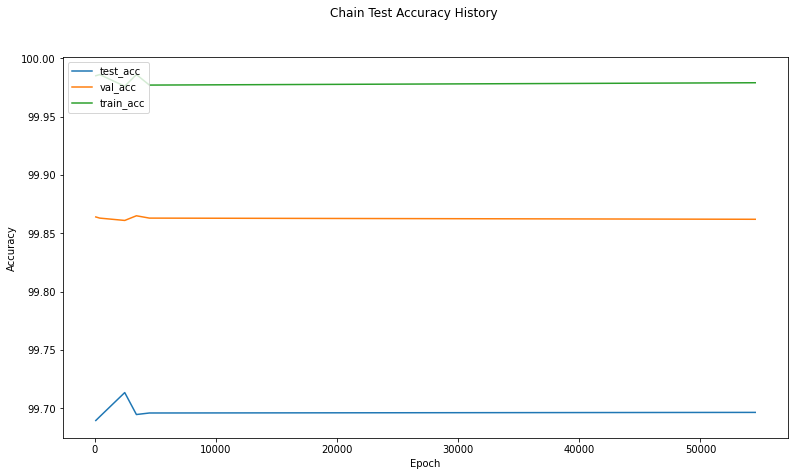

In [28]:
from matplotlib import pyplot as plt
import pandas as pd

chain_test_stuff = [
    "99.68955517 - tr_model_14060_0.99864_0.99985_100.h5",
    "99.69284534 - tr_model_14060_0.99863_0.99986_425.h5",
    "99.69467521 - tr_model_14060_0.99865_0.99986_3452.h5",
    "99.69599247 - tr_model_14060_0.99863_0.99977_4524.h5",
    "99.69650507 - tr_model_14060_0.99862_0.99979_54525.h5",
    "99.71348047 - tr_model_14060_0.99861_0.99976_2488.h5",
]

# Constants for both graphs.
graph_width_inches = 13
graph_height_inches = 7

title = "Chain Test Accuracy History"
fig = plt.figure(1)
fig.suptitle(title)
fig.set_size_inches(graph_width_inches,graph_height_inches)

# Gather points. Every point should be indexed by epoch. 
indices = []
test_accs = []
val_accs = []
train_accs = []

for string in chain_test_stuff:
    epoch = None
    test_acc = None
    val_acc = None
    train_acc = None

    string_split_apos = string.split(" - ")
    test_acc = float(string_split_apos[0].strip())

    result_string_split = string_split_apos[1].split("_")
    epoch = int(result_string_split[5].split(".h")[0].strip())
    val_acc = float(result_string_split[3].strip())*100
    train_acc = float(result_string_split[4].strip())*100

    indices.append(epoch)
    test_accs.append(test_acc)
    val_accs.append(val_acc)
    train_accs.append(train_acc)
    
data= []
for i in range(0, len(indices)):
  data.append([indices[i], test_accs[i], val_accs[i], train_accs[i]])

df = pd.DataFrame(data, columns = ["epoch", "test_acc", "val_acc", "train_acc"])
df.sort_values("epoch", axis=0, inplace=True)
df = df.astype(float)
df.set_index("epoch", drop=True, inplace=True)

# With our dataframe, we can finally graph the history. 
plt.plot(df["test_acc"])
plt.plot(df["val_acc"])
plt.plot(df["train_acc"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["test_acc", "val_acc", "train_acc"], loc="upper left")

df